

<a href="https://githubtocolab.com/Astolfo2332/VIU_act/blob/main/optimizacion/Algoritmos_R3.ipynb" target="_parent\">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" > </a>


# Algoritmos de optimización - Reto 3

Nombre: <br> Miguel López Vélez <br>
Github: <br> [Astolfo2332](https://github.com/Astolfo2332/VIU_act) <br>

### Implementar uno de los siguientes retos para el problema de TSP trabajado en clase:
- Mejorar la implementación de búsqueda local implementada en  clase sobre el TSP con otros operadores de vecindad.
- Implementar el algoritmo de búsqueda tabú para el TSP de la AG3.
- Mejorar la implementación de recocido simulado implementado en clase sobre el TSP eligiendo una generación de solución vecina con un grado de aleatoriedad menor (función genera_vecino_aleatorio()).
 - Mejorar la implementación de colonia de hormigas implementada en clase sobre el TSP mediante una elección de nodo que tenga en consideración una función de probabilidad que depende de las feromonas.
- Mejorar la implementación del algoritmo genético propuesto para la resolución del TSP.

### Mejora de la implementación de colonia de hormigas sobre el TSP.

In [3]:
import os
import urllib.request
import gzip

from sympy.abc import alpha

#DATOS DEL PROBLEMA
file = "swiss42.tsp"
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
f = gzip.open(file + '.gz')
with open (file, 'wb') as out:
    out.write(f.read())
f.close()

# os.rename("swiss42.tsp", "datasets/swiss42.tsp")
os.remove("swiss42.tsp.gz")
os.remove("swiss42.tsp")

Rehusamos gran parte del código de colonia de hormigas

In [110]:

import tsplib95

problem = tsplib95.load("./datasets/swiss42.tsp")
#Nodos
Nodos = list(problem.get_nodes())

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
    return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion(lista de nodos)
def distancia_total(solucion, problem):
    distancia_total = 0
    for i in range(len(solucion)-1):
        distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
    return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)



In [155]:
import random
from math import e
import numpy as np

def Add_Nodo(problem, H ,T ) :
    #Mejora:Establecer una funcion de probabilidad para
    # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
    Nodos = list(problem.get_nodes())

    return random.choice(list(set(range(1,len(Nodos))) - set(H) )  )


def Incrementa_Feromona(problem, T, H):
    #Incrementa según la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total
    delta_T = 0
    for i in range(len(H)-1):
        T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
    return T, delta_T

def Evaporar_Feromonas(T, delta_T):
    #Evapora 0.3 el valor de la feromona, sin que baje de 1
    #Mejora:Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
    T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
    return T


In [112]:
def hormigas(problem, N) :
    #problem = datos del problema
    #N = Número de agentes(hormigas)

    #Nodos
    Nodos = list(problem.get_nodes())
    #Aristas
    Aristas = list(problem.get_edges())

    #Inicializa las aristas con una cantidad inicial de feromonas:1
    #Mejora: inicializar con valores diferentes dependiendo diferentes criterios
    T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]
    delta_T = [[0 for _ in range(len(T))] for _ in range(len(T))]

    #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
    Hormiga = [[0] for _ in range(N)]

    #Recorre cada agente construyendo la solución
    for h in range(N) :
        #Para cada agente se construye un camino
        for i in range(len(Nodos)-1) :

            #Elige el siguiente nodo
            Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] ,T )
            Hormiga[h].append(Nuevo_Nodo)

        #Incrementa feromonas en esa arista
        T, delta_T = Incrementa_Feromona(problem, T, Hormiga[h])

        #Evapora Feromonas
        T = Evaporar_Feromonas(T, delta_T)

        #Seleccionamos el mejor agente
    mejor_solucion = []
    mejor_distancia = float('inf')
    for h in range(N) :
        distancia_actual = distancia_total(Hormiga[h], problem)
        if distancia_actual < mejor_distancia:
            mejor_solucion = Hormiga[h]
            mejor_distancia =distancia_actual


    print(mejor_solucion)
    print(mejor_distancia)
    return mejor_distancia

d = hormigas(problem, 1000)

[0, 19, 4, 33, 31, 35, 38, 21, 27, 18, 1, 32, 13, 16, 37, 5, 36, 3, 6, 9, 23, 20, 17, 14, 7, 26, 24, 30, 11, 34, 2, 29, 8, 10, 25, 15, 12, 41, 28, 39, 22, 40]
3962


In [113]:
def test(hormigas, problem, N):
    data = []
    for _ in range(10):
        data.append(hormigas(problem, 1000))

    prom_test = np.mean(data)
    dev_test = np.std(data)
    print(f"Promedio: {prom_test} Desviación estándar: {dev_test}")
    return prom_test, dev_test

## Datos del algoritmo sin mejorar

In [114]:
prom_ini, dev_ini = test(hormigas, problem, 1000)

[0, 4, 29, 26, 32, 30, 7, 1, 34, 27, 9, 2, 23, 39, 24, 31, 35, 33, 3, 10, 25, 40, 22, 12, 11, 14, 37, 8, 5, 19, 16, 18, 38, 21, 41, 28, 6, 13, 20, 36, 15, 17]
3651
[0, 35, 36, 19, 25, 40, 30, 38, 4, 8, 23, 26, 7, 10, 28, 33, 27, 9, 20, 29, 37, 16, 11, 1, 22, 24, 39, 13, 12, 31, 6, 34, 2, 21, 41, 18, 17, 15, 14, 5, 32, 3]
4035
[0, 41, 25, 3, 26, 14, 33, 1, 31, 38, 20, 36, 16, 2, 35, 37, 34, 22, 39, 24, 6, 7, 12, 11, 18, 30, 19, 13, 10, 29, 5, 8, 21, 17, 9, 40, 23, 15, 4, 28, 27, 32]
3948
[0, 2, 28, 17, 34, 35, 6, 41, 18, 23, 25, 9, 29, 19, 10, 4, 31, 14, 3, 15, 11, 1, 37, 12, 13, 16, 36, 7, 26, 39, 21, 5, 32, 40, 20, 33, 38, 22, 30, 8, 24, 27]
3926
[0, 30, 29, 32, 12, 25, 8, 27, 6, 37, 14, 1, 31, 36, 17, 38, 41, 9, 2, 7, 39, 40, 13, 3, 24, 11, 16, 15, 35, 28, 20, 33, 26, 10, 34, 4, 5, 22, 18, 19, 23, 21]
4029
[0, 2, 37, 33, 5, 31, 26, 18, 12, 13, 36, 35, 20, 22, 38, 17, 21, 39, 8, 27, 29, 24, 23, 9, 4, 40, 41, 10, 30, 28, 15, 11, 6, 3, 1, 32, 34, 19, 7, 25, 14, 16]
3651
[0, 6, 28, 41, 4

## Datos del algoritmo con una mejora en la selección de nodos


La función Add_Nodo selecciona al azar un nodo con probabilidad uniforme.
Para ser mas eficiente debería seleccionar el próximo nodo siguiendo la probabilidad correspondiente a la ecuación:

$p^k_{ij}(t) = \frac{[\tau_{ij}(t)]^\alpha[\nu_{ij}]^\beta}{\sum_{l\in J^k_i} [\tau_{il}(t)]^\alpha[\nu_{il}]^\beta}$, si $j \in J^k_i$

$p^k_{ij}(t) = 0$, si $j \notin J^k_i$

Donde en este caso $\nu_{ij} = \frac{1}{d_{ij}}$ y $d_{ij}$ es la distancia entre los nodos i y j.



In [156]:
def Add_Nodo(problem, H ,T ) :
    #Mejora:Establecer una funcion de probabilidad para
    # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
    Nodos = list(problem.get_nodes())

    # Le damos un valor de mayor posibilidad a los nodos con más feromonas
    # a base de la ecuación de probabilidad de la colonia de hormigas
    alpha = 0.9
    beta = 0.7

    prob = []
    for nodo in range(len(Nodos)):
        #Calculamos la probabilida de ir al nodo
        if nodo not in H:
            #Obtenemos las feromonas a base de la hormiga anterior
            prob.append((T[H[-1]][nodo]**alpha) * ((1/distancia(H[-1], nodo, problem))**beta))
        else:
            #Si ya está en el camino, no se puede volver a seleccionar
            prob.append(0)

    #Normalizamos las probabilidades
    prob = [p/sum(prob) for p in prob]

    return random.choices(range(len(Nodos)), weights=prob)[0]

In [157]:
prom_fin, dev_fin = test(hormigas, problem, 1000)

[0, 30, 22, 38, 19, 32, 3, 31, 21, 27, 28, 40, 24, 7, 15, 1, 6, 16, 14, 18, 5, 29, 23, 41, 12, 11, 26, 9, 13, 37, 33, 34, 36, 35, 17, 20, 39, 25, 8, 10, 4, 2]
3367
[0, 34, 36, 31, 1, 3, 27, 6, 13, 32, 35, 30, 11, 25, 28, 12, 18, 2, 38, 22, 40, 14, 5, 16, 15, 17, 26, 41, 10, 19, 23, 29, 24, 8, 39, 21, 9, 4, 37, 7, 20, 33]
3406
[0, 2, 4, 5, 13, 26, 33, 38, 22, 11, 23, 15, 17, 16, 14, 37, 6, 30, 10, 7, 1, 18, 3, 27, 28, 25, 21, 41, 24, 9, 29, 32, 31, 12, 8, 40, 39, 19, 35, 36, 20, 34]
3244
[0, 26, 25, 39, 1, 3, 6, 32, 2, 4, 12, 11, 10, 31, 36, 15, 16, 17, 35, 37, 19, 14, 5, 20, 27, 22, 34, 30, 29, 8, 38, 13, 28, 9, 23, 21, 40, 41, 24, 18, 33, 7]
3333
[0, 12, 8, 41, 31, 17, 7, 3, 1, 32, 29, 9, 39, 20, 4, 28, 27, 16, 14, 15, 37, 36, 10, 40, 21, 22, 24, 38, 2, 34, 33, 13, 18, 19, 30, 26, 6, 5, 11, 35, 23, 25]
3471
[0, 13, 14, 41, 9, 20, 34, 1, 29, 10, 8, 6, 27, 35, 15, 37, 16, 17, 33, 38, 23, 21, 28, 4, 26, 30, 19, 7, 39, 24, 40, 25, 12, 18, 3, 2, 32, 11, 5, 36, 31, 22]
3477
[0, 2, 3, 27, 11

Mejorando la selección de nodos y disminuyendo la distancia cerca de 500 unidades.

¿Podemos mejorarlo más? Podemos cambiar la función de evaporación de feromonas siguiendo lo propuesto por el algoritmo dado por la formúla:

$$
\tau_{xy} \leftarrow (1 - \rho) \tau_{xy} + \sum_{k} \Delta \tau_{xy}^k
$$


In [167]:
def Incrementa_Feromona(problem, T, H ) :
    #Incrementa según la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total

    delta_T = [[0 for _ in range(len(T))] for _ in range(len(T))]

    for i in range(len(H)-1):
        T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
        delta_T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
    return T, delta_T

def Evaporar_Feromonas(T, delta_T):
    #Aplicamos la formúla de evaporación de feromonas
    rho = 0.3
    T = [[ max((1 - rho) * T[i][j] + delta_T[i][j], 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]

    return T

In [168]:
prom_update, dev_update = test(hormigas, problem, 1000)

[0, 17, 31, 20, 26, 4, 1, 2, 29, 8, 10, 34, 32, 18, 16, 13, 40, 24, 14, 19, 27, 41, 3, 39, 30, 38, 21, 28, 5, 23, 22, 33, 36, 35, 15, 37, 9, 25, 12, 11, 6, 7]
3498
[0, 12, 11, 18, 5, 19, 15, 9, 30, 38, 1, 6, 37, 7, 27, 2, 14, 17, 31, 29, 8, 10, 40, 41, 23, 32, 16, 22, 24, 39, 4, 3, 35, 33, 20, 28, 26, 25, 21, 13, 34, 36]
3508
[0, 22, 32, 30, 34, 4, 12, 11, 33, 20, 35, 17, 1, 36, 3, 2, 14, 28, 13, 31, 25, 10, 41, 18, 7, 37, 26, 5, 6, 15, 19, 16, 24, 40, 21, 27, 29, 39, 9, 8, 23, 38]
3418
[0, 19, 28, 3, 6, 25, 10, 5, 18, 33, 32, 38, 20, 15, 17, 26, 34, 36, 12, 41, 8, 9, 40, 24, 21, 39, 29, 14, 16, 7, 31, 35, 30, 1, 2, 37, 11, 23, 22, 13, 4, 27]
3400
[0, 4, 12, 14, 26, 1, 13, 16, 31, 15, 3, 20, 33, 17, 30, 21, 24, 40, 28, 7, 9, 39, 41, 34, 19, 36, 37, 25, 11, 18, 27, 2, 10, 29, 23, 8, 22, 38, 35, 5, 6, 32]
3456
[0, 36, 17, 35, 28, 29, 2, 12, 6, 4, 26, 3, 27, 34, 37, 24, 39, 21, 41, 23, 9, 30, 38, 40, 33, 1, 10, 25, 22, 8, 18, 13, 20, 31, 14, 19, 32, 7, 11, 5, 16, 15]
3368
[0, 30, 29, 8, 3

Eliminando la restricción de que la feromona no puede ser menor a 1:

In [171]:
def Evaporar_Feromonas(T, delta_T):
    #Aplicamos la formúla de evaporación de feromonas
    rho = 0.3
    T = [[ (1 - rho) * T[i][j] + delta_T[i][j] for i in range(len(Nodos)) ] for j in range(len(Nodos))]

    return T

In [172]:
prom_update_2, dev_update_2 = test(hormigas, problem, 1000)

[0, 16, 14, 32, 22, 9, 8, 41, 10, 12, 21, 24, 40, 29, 26, 31, 17, 7, 1, 4, 3, 38, 34, 33, 20, 27, 23, 39, 2, 19, 5, 13, 36, 11, 25, 18, 35, 37, 15, 6, 30, 28]
2986
[0, 14, 25, 18, 26, 33, 41, 21, 22, 15, 16, 19, 5, 13, 12, 1, 4, 9, 8, 11, 10, 23, 30, 6, 35, 32, 29, 24, 40, 39, 17, 31, 36, 37, 3, 2, 28, 27, 7, 20, 34, 38]
3217
[0, 27, 2, 8, 37, 15, 36, 21, 39, 29, 22, 40, 18, 30, 28, 1, 4, 23, 9, 32, 38, 35, 31, 19, 13, 25, 11, 16, 17, 3, 26, 5, 41, 14, 7, 24, 20, 34, 33, 6, 10, 12]
3651
[0, 1, 6, 13, 11, 12, 39, 5, 2, 30, 18, 22, 40, 29, 35, 33, 34, 20, 17, 31, 7, 15, 14, 19, 27, 32, 16, 37, 38, 4, 25, 41, 8, 9, 26, 3, 36, 24, 21, 23, 10, 28]
3268
[0, 28, 29, 30, 34, 32, 8, 14, 7, 12, 22, 39, 21, 3, 11, 18, 6, 1, 38, 26, 13, 5, 19, 16, 15, 37, 20, 33, 36, 35, 24, 40, 41, 23, 31, 17, 9, 2, 27, 4, 25, 10]
3095
[0, 1, 6, 4, 26, 10, 27, 32, 38, 21, 22, 30, 33, 34, 28, 29, 3, 2, 18, 11, 12, 9, 7, 15, 40, 23, 24, 39, 41, 20, 13, 37, 31, 17, 25, 8, 14, 16, 5, 19, 36, 35]
3135
[0, 20, 5, 26, 1

Comparando los resultados tenemos que:

Como se puede observar la mejora de nodos y evaporación es la mejor en este caso, pero a coste de una mayor desviación estándar que solo la mejora de nodos, debido principalmente a el cambio de evaporación de femonas donde puede disminuir a valores por debajo de 1 disminuyendo el factor de diversificación, aun así se logra disminuir cerca de 800 unidades con respecto al algoritmo original.

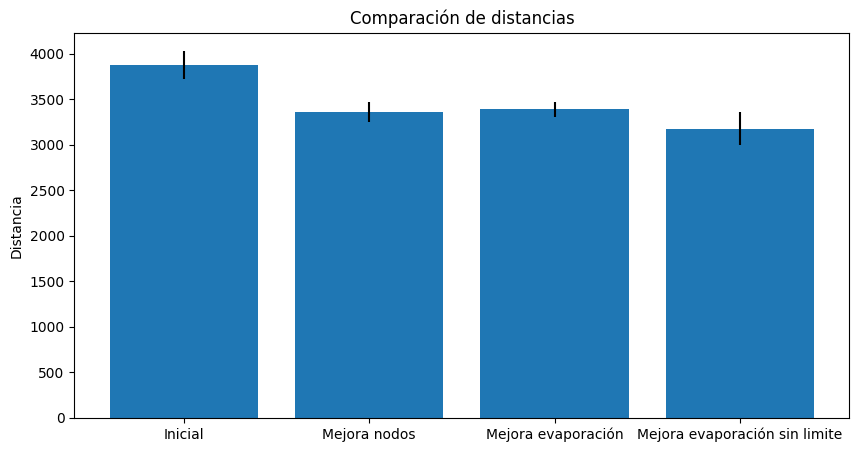

In [175]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.bar(["Inicial", "Mejora nodos", "Mejora evaporación", "Mejora evaporación sin limite"],
        [prom_ini, prom_fin, prom_update, prom_update_2],
        yerr=[dev_ini, dev_fin, dev_update, dev_update_2])
plt.ylabel("Distancia")
plt.title("Comparación de distancias")

plt.show()